In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np  

In [17]:
data = pd.read_csv('universityemployment.csv')

In [18]:
data.head()

,year,university,school,degree,employment_rate_overall,employment_rate_ft_perm,basic_monthly_mean,basic_monthly_median,gross_monthly_mean,gross_monthly_median,gross_mthly_25_percentile,gross_mthly_75_percentile
0,2013,Nanyang Technological University,College of Business (Nanyang Business School),Accountancy and Business,97.4,96.1,3701,3200,3727,3350,2900,4000
1,2013,Nanyang Technological University,College of Business (Nanyang Business School),Accountancy (3-yr direct Honours Programme),97.1,95.7,2850,2700,2938,2700,2700,2900
2,2013,Nanyang Technological University,College of Business (Nanyang Business School),Business (3-yr direct Honours Programme),90.9,85.7,3053,3000,3214,3000,2700,3500
3,2013,Nanyang Technological University,College of Business (Nanyang Business School),Business and Computing,87.5,87.5,3557,3400,3615,3400,3000,4100
4,2013,Nanyang Technological University,College of Engineering,Aerospace Engineering,95.3,95.3,3494,3500,3536,3500,3100,3816


In [19]:
df = pd.DataFrame(data)

In [20]:
df['university'] = df['university'].replace('Nanyang Technological University', 'NTU')
df['university'] = df['university'].replace('National University of Singapore', 'NUS')
df['university'] = df['university'].replace('Singapore Management University', 'SMU')
df['university'] = df['university'].replace('Singapore University of Social Sciences', 'SUSS')
df['university'] = df['university'].replace('Singapore Institute of Technology', 'SIT')
df['university'] = df['university'].replace('Singapore University of Technology and Design', 'SUTD')

In [21]:
df = df.drop(['school', 'gross_mthly_25_percentile', 'gross_mthly_75_percentile', 'employment_rate_ft_perm', 'basic_monthly_median', 'gross_monthly_median'], axis=1)

In [22]:
df = df[df['degree'].str.contains('Computer Science',case=False, na=False)]
df = df[~df['degree'].str.contains('computer science & game design', case=False, na=False)]
df = df[~df['degree'].str.contains('computer science and game design', case=False, na=False)]   
df = df.dropna()

In [23]:
display(df)

,year,university,degree,employment_rate_overall,basic_monthly_mean,gross_monthly_mean
9,2013,NTU,Computer Science,92.1,3249,3306
44,2013,NUS,Bachelor of Computing (Computer Science),92.4,3933,3953
94,2014,NTU,Computer Science,94.5,3269,3304
129,2014,NUS,Bachelor of Computing (Computer Science),90.6,3729,3712
173,2014,SIT,Bachelor of Science in Computer Science in Rea...,100,2859,2910
206,2015,NTU,Computer Science,92.4,3489,3535
243,2015,NUS,Bachelor of Computing (Computer Science),97,3847,3890
292,2015,SIT,Bachelor of Science in Computer Science in Rea...,95.2,3332,3346
328,2016,NTU,Computer Science,94.6,3784,3848
382,2016,NUS,Bachelor of Computing (Computer Science),96.3,4320,4385


In [24]:
df['basic_monthly_mean'] = pd.to_numeric(df['basic_monthly_mean'], errors='coerce')
df['gross_monthly_mean'] = pd.to_numeric(df['gross_monthly_mean'], errors='coerce')
df['employment_rate_overall'] = pd.to_numeric(df['employment_rate_overall'], errors='coerce')

df = df.dropna(subset=['basic_monthly_mean', 'gross_monthly_mean', 'employment_rate_overall'])

df['basic_monthly_mean'] = df['basic_monthly_mean'].astype(int)
df['gross_monthly_mean'] = df['gross_monthly_mean'].astype(int)
df['employment_rate_overall'] = df['employment_rate_overall'].astype(int)

In [25]:
display(df)

,year,university,degree,employment_rate_overall,basic_monthly_mean,gross_monthly_mean
9,2013,NTU,Computer Science,92,3249,3306
44,2013,NUS,Bachelor of Computing (Computer Science),92,3933,3953
94,2014,NTU,Computer Science,94,3269,3304
129,2014,NUS,Bachelor of Computing (Computer Science),90,3729,3712
173,2014,SIT,Bachelor of Science in Computer Science in Rea...,100,2859,2910
206,2015,NTU,Computer Science,92,3489,3535
243,2015,NUS,Bachelor of Computing (Computer Science),97,3847,3890
292,2015,SIT,Bachelor of Science in Computer Science in Rea...,95,3332,3346
328,2016,NTU,Computer Science,94,3784,3848
382,2016,NUS,Bachelor of Computing (Computer Science),96,4320,4385


In [26]:
df.to_csv('universityemployment_cleaned.csv', index=False)

In [27]:
df_nus = df[df['university'] == 'NUS']
df_ntu = df[df['university'] == 'NTU']
df_smu = df[df['university'] == 'SMU'] 
df_suss = df[df['university'] == 'SUSS'] 
df_sit = df[df['university'] == 'SIT']
df_sutd = df[df['university'] == 'SUTD']        

In [31]:
df_grouped = df.groupby(['year'], as_index=False).mean()
display(df_grouped)

TypeError: agg function failed [how->mean,dtype->object]

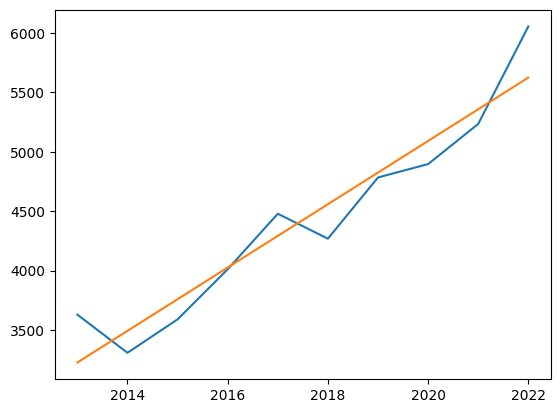

In [ ]:
reg = np.polyfit(df_grouped['year'], df_grouped['gross_monthly_mean'], 1)
ry = np.polyval(reg, df_grouped['year'])
plt.plot(df_grouped['year'], df_grouped['gross_monthly_mean'], label='Gross Monthly Mean Salary')
plt.plot(df_grouped['year'], ry, label='Trendline')

In [ ]:
predict=np.poly1d(reg)
print(f'2023 prediction: {int(predict(2023))}')
print(f'2024 prediction: {int(predict(2024))}')
print(f'2025 prediction: {int(predict(2025))}')

2023 prediction: 5891
2024 prediction: 6158
2025 prediction: 6424


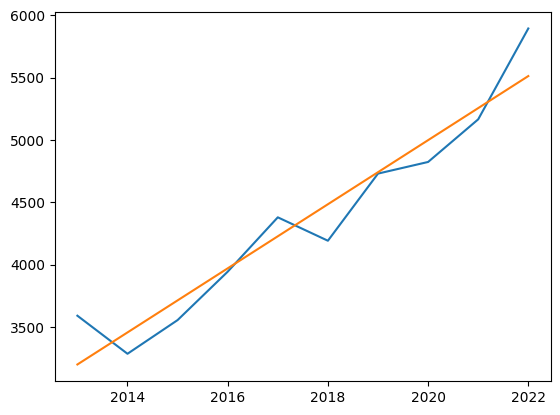

In [ ]:
reg_basic = np.polyfit(df_grouped['year'], df_grouped['basic_monthly_mean'], 1)
ry_basic = np.polyval(reg_basic, df_grouped['year'])
plt.plot(df_grouped['year'], df_grouped['basic_monthly_mean'], label='Basic Monthly Mean Salary')
plt.plot(df_grouped['year'], ry_basic, label='Trendline')

In [ ]:
predict_basic=np.poly1d(reg_basic)
print(f'2023 prediction: {int(predict_basic(2023))}')   
print(f'2024 prediction: {int(predict_basic(2024))}')
print(f'2025 prediction: {int(predict_basic(2025))}')

2023 prediction: 5771
2024 prediction: 6028
2025 prediction: 6285
